# **What factors put college students at higher risk for illness?**

**Head Detective:** Brenda Xu <br>
**Email:** bx320@stern.nyu.edu

For my project, I will be using two data sets I found on Kaggle, in order to see if the food preferences and eating habits of college students with a certain characteristic will put them at a higher risk of an adverse food-related event. The two datasets are: [Adverse Food Events](https://www.kaggle.com/fda/adverse-food-events) and [Food Choices of College Students](https://www.kaggle.com/borapajo/food-choices).

**Access:** All the data I used came from the Adverse Food Events and Food Choices of College students dataset. For ease of access, I have reuploaded them to my Github so that Pandas can read the raw csv.
All of the data was originally downloaded off the website as a .zip file, which can be found by following the links above.

## Overview

There is a two-part analysis. The first is on the kinds of food that cause severe symptoms, in this case, death. For the severe symptoms section, I filtered the adverse food events file to only include events that ended in death, then looked at the industry group that those foods were in. I then matched the industry group to how often students consume them, and then filtered the students by gender, GPA, family income, to see if there was a difference in how often they consume this highly dangerous type of food, and if there was a difference based on any of the characteristics I chose.

The second part follows the same process, except that the analysis is on mild symptoms, in this case malaise, vomiting, and nausea. 

This is meant to be a lighthearted project where I manipulate and apply data from two seemingly unrelated datasets. Please do not follow the conclusions from the data.

## Project start!

In [273]:
#below are the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


First, I will read in the file that contains a list of about 90,000 adverse food-related events, collected by the FDA between 2004 and 2017. A detailed description of column contents is [here](https://www.fda.gov/downloads/Food/ComplianceEnforcement/UCM494019.pdf). The most important columns for this project are "PRI_FDA Industry Name" which was later renamed to "Industry_Name", "AEC_One Row Outcomes" which was later renamed "Outcome", and "SYM_One Row Coded Symptoms" which was later renamed to "Symptoms". 

In [274]:
url = "https://raw.githubusercontent.com/bx320/Data_Bootcamp_Final_Project/master/CAERS_ASCII_2004_2017Q2.csv"

adverse = pd.read_csv(url)
adverse.head(5)

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [275]:
adverse.columns = ["Report_ID", "Event_Entered", "Event_Start_Date", "Suspect_or_Concomitant?","Product_Name", "Industry_Code", 
                  "Industry_Name", "Consumer_Age", "Units_of_Age", "Gender", "Outcome", "Symptoms"]
#renaming the columns for clarity

The most important columns for this project are "Industry_Name", "Outcome", and "Symptoms". Industry_Name gives a broad categorization of what the food is, such as a baked good, fruit, vegetable, cosmetic item, etc. Outcome tells what happened to the patient. The entries under Outcome include "Visited an ER", "Visited a health care provider", "Non-serious injuries/illness", and others. Symptoms tells the symptoms experienced by the patient. There is a large variety of symptoms, such as wheezing, cough, rash, headache, etc.

For example, the first entry under adverse indicates that a 2 year old female experienced a swelling of the face, rash, wheezing, cough, etc., and visited a health care provider and an ER after consuming Midwest Country Fair Chocolate Flavored Chips on August 04, 2003.

In [276]:
del adverse['Suspect_or_Concomitant?'] #not significant, almost all entries were suspect
del adverse["Industry_Code"] #numerical indication of  Industry_Name, redundant
del adverse["Event_Entered"] #some events happened before 2004, but were only recorded starting in January 2004


In [277]:
adverse = adverse.set_index("Report_ID") #looks better, and can fit without scrolling horizontally

In [278]:
adverse.head()

,Event_Start_Date,Product_Name,Industry_Name,Consumer_Age,Units_of_Age,Gender,Outcome,Symptoms
Report_ID,,,,,,,,
65325,8/4/2003,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
65325,8/4/2003,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
65333,NaN,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
65335,11/24/2003,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
65336,NaN,ENFIMIL LIPIL BABY FORMULA,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


Next, I will read in the college_foods preferences dataset. This dataset also came from Kaggle, and contains 126 entries from a survey done of students at Mercyhurst University, a Catholic liberal arts college in Pennsylvania. 

In [279]:
url1 = "https://raw.githubusercontent.com/bx320/Data_Bootcamp_Final_Project/master/food_coded.csv"
college_food = pd.read_csv(url1)

In [280]:
college_food.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


There are 61 columns, for a variety of questions regarding students' food preferences and some basic personal information. A list of all the columns and an explanation of the meanings they contain is [here](https://github.com/bx320/Data_Bootcamp_Final_Project/blob/master/codebook_food.pdf). 

In [281]:
college_food1 = college_food[["GPA","Gender","income", "fruit_day", "vitamins", "veggies_day"]]
college_food1.head(10)


,GPA,Gender,income,fruit_day,vitamins,veggies_day
0,2.4,2,5.0,5,1,5
1,3.654,1,4.0,4,2,4
2,3.3,1,6.0,5,1,5
3,3.2,1,6.0,4,1,3
4,3.5,1,6.0,4,2,4
5,2.25,1,1.0,2,2,1
6,3.8,2,4.0,4,1,4
7,3.3,1,5.0,5,2,4
8,3.3,1,5.0,4,2,3
9,3.3,1,4.0,5,1,5


For clarity, I have highlighted the six columns that I will be using for this project in the dataframe above. 

GPA is the students' self-reported GPA.

Gender is a 1 if female and 2 if male. 

Income is ranked on a scale of 1-6, with 1 being in the lowest bracket and 6 in the highest bracket. 

fruit_day is the students' self-reported scale of how likely they are to eat fruit on a regular day, with 1 being the lowest and 5 being the highest. 

veggies_day asks the same question, except with vegetables. 

Vitamins asks if students take vitamins regularly: 1 is for yes and 2 is for no.

***

**This next section is some cleanup of the dataset. **

In [284]:
adverse = adverse[pd.notnull(adverse["Outcome"])] #this drops rows where there's nothing under the Outcome column
adverse = adverse[pd.notnull(adverse["Symptoms"])] #this drops rows where there's nothing under the Symptoms column

In [285]:
#college_food.dtypes
college_food.dropna(subset=["GPA"], axis = 0 , inplace= True) 
#There are some no-responses from students when asked for their GPA. We'll drop those rows first.

In [286]:
college_food.GPA = [x.strip(" abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ") for x in college_food.GPA]
#this takes out entries under the GPA column that aren't their GPA. Some people put "Unknown" or "Personal"
#another student put a comment after their GPA, so that should be removed as well

college_food['GPA'].replace('', np.nan, inplace=True)
#replace the now empty GPA entries with NaN...

college_food.dropna(subset=["GPA"], axis = 0 , inplace= True)
#...so that the entire row can be dropped

college_food["GPA"]=college_food["GPA"].astype(float)
#convert the GPA column from object to float, so we can compare students by GPA



## Serious adverse food-related events
Next we return to the FDA's adverse food events dataset. I made a new dataframe that only took rows if "death" was under Outcome column. I had to use str.match(), because groupby() wasn't an option because each entry is one string, and sometimes patients visited an ER or healthcare provider before death.

In [287]:
deaths = adverse[adverse["Outcome"].str.match('DEATH')] #making the new dataframe

deaths.head()

,Event_Start_Date,Product_Name,Industry_Name,Consumer_Age,Units_of_Age,Gender,Outcome,Symptoms
Report_ID,,,,,,,,
65350,NaN,GRAPE,Fruit/Fruit Prod,NaN,Not Available,Not Available,DEATH,"DEATH, CHOKING"
65399,11/22/2003,METOBOLITE 356,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH"
65400,9/5/2001,METABOLIFE,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Year(s),Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE"
65440,10/28/2003,HERBS FOR LIFE GHR-GOLDALL NATURAL GROWTH HORM...,Vit/Min/Prot/Unconv Diet(Human/Animal),73.0,Year(s),Male,"DEATH, VISITED A HEALTH CARE PROVIDER, LIFE TH...","CREUTZFELDT-JAKOB DISEASE, HOSPITALISATION, DEATH"
67305,2/18/2004,STACKER 2,Vit/Min/Prot/Unconv Diet(Human/Animal),20.0,Year(s),Male,DEATH,DEATH


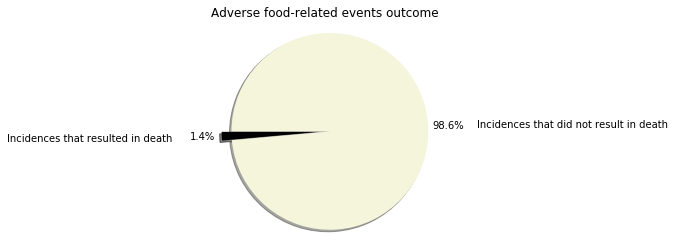

In [288]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "Incidences that resulted in death", "Incidences that did not result in death"
sizes = deaths.shape[0], adverse.shape[0]-deaths.shape[0]
explode = (0, 0.1) 

#fig1, ax1 = plt.subplots()
plt.title("Adverse food-related events outcome")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, colors = ("black", "beige"), pctdistance=1.2, labeldistance=1.5)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

Out of 90,781 entries in the adverse food events dataset, 1,284 resulted in death, which is about 1.4%.

Next we want to take a look at what is causing most of those deaths, because we need to match it to the eating habits of college students. A huge majority of causes of death is in cosmetics and Vit/Min/Prot/Unconv Diet(Human/Animal). 

Vit/Min/Prot/Unconv Diet(Human/Animal) refers mostly to vitamins and dietary supplements. There is no standout brand or product causing those, and each specific product name is mostly responsible for less than 4 out of over 500 vitamin/supplement related deaths. If interested in seeing the brand names, please uncomment the cell directly below this one.

Cosmetics were disregarded for two reasons: college students don't eat those on purpose and they were not included in the survey, and almost all of the brand names were redacted, making it impossible to confirm what kind of cosmetics actually caused those events. If interested in seeing statistics about the names of the cosmetics, please uncomment the cell two below this one.


In [289]:
# showvitamins = deaths.loc[deaths["Industry_Name"] == "Vit/Min/Prot/Unconv Diet(Human/Animal)"]
# showvitamins.Product_Name.value_counts()

In [290]:
# showCosmetics = deaths.loc[deaths['Industry_Name'] == 'Cosmetics']
# showCosmetics.Product_Name.value_counts()

In [291]:
deaths.Industry_Name.value_counts()
#this shows items that caused death, grouped by industry

Cosmetics                                 556
Vit/Min/Prot/Unconv Diet(Human/Animal)    537
Dietary Conv Food/Meal Replacements        57
Fishery/Seafood Prod                       39
Baby Food Prod                             30
Soft Drink/Water                           12
Nuts/Edible Seed                           10
Bakery Prod/Dough/Mix/Icing                10
Vegetables/Vegetable Products               7
Cheese/Cheese Prod                          5
Food Additives (Human Use)                  3
Fruit/Fruit Prod                            3
Ice Cream Prod                              2
Candy W/O Choc/Special/Chew Gum             2
Milk/Butter/Dried Milk Prod                 2
Food Sweeteners (Nutritive)                 2
Coffee/Tea                                  1
Vegetable Oils                              1
Snack Food Item                             1
Egg/Egg Prod                                1
Mult Food Dinner/Grav/Sauce/Special         1
Alcoholic Beverage                

See the pie chart below for the breakdown of causes of death. 

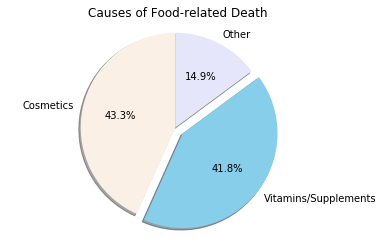

In [292]:
deathcounts = deaths.Industry_Name.value_counts().to_frame()

labels = "Cosmetics", "Vitamins/Supplements","Other"
sizes = [deathcounts.Industry_Name[0], deathcounts.Industry_Name[1], 
         deaths.shape[0] - (deathcounts.Industry_Name[0] + deathcounts.Industry_Name[1])]
explode = (0, 0.1, 0 ) 

#fig1, ax1 = plt.subplots()
plt.title("Causes of Food-related Death")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ("linen", "skyblue","lavender"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


1.4% of all adverse food events resulted in death. Of that 1.4%, 41.8% of them were caused by some sort of vitamin or dietary supplement. I then became curious: within college students, are there certain factors that may cause them to have a high exposure to vitamin-related deaths? 

Coincidentally, there was a question on the college students' survey that asked about vitamin intake, although it was only a 1 if they take vitamins or supplements, and a 2 if they do not. Still, this information is usable. 

However, the notation used in the original dataset is confusing. A more intuitive way to express it would be a 1 if they take vitamins, and a 0 if they do not.

In [293]:
college_food.vitamins.value_counts()
#Pretty even split on vitamins/no vitamins
#1 means they take vitamins, 2 means they don't. 


2    63
1    58
Name: vitamins, dtype: int64

In [294]:
overall_vitamins = 58/(58+63)

In [295]:
college_food["vitamins"] = college_food["vitamins"]*(-1) + 2
#change the 2, meaning they don't take vitamins, to a 0, and keep the 1 as 1.
#don't run this cell more than once. 

#Important: if at any point a pie chart 
    #returns a negative % or otherwise doesn't look like a regular pie chart,
    #run this cell again.

In [296]:
college_food.vitamins.value_counts()
#We've confirmed that changing the notation doesn't accidentally change the data

0    63
1    58
Name: vitamins, dtype: int64

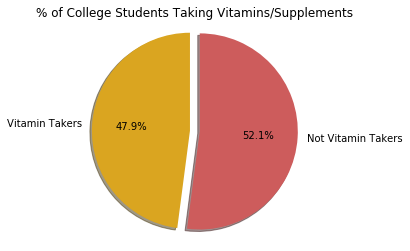

In [297]:
labels = "Vitamin Takers", "Not Vitamin Takers"
sizes = [overall_vitamins, 1 - overall_vitamins]
explode = (0, 0.1 ) 

plt.title("% of College Students Taking Vitamins/Supplements")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ("goldenrod", "indianred"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

This chart shows the percentage of all students surveyed who said they take vitamins/supplments. There is an almost even split, with slightly more people not taking vitamins.


***

We will now separate students by 3 charcateristics: GPA, income, and gender. First is GPA. 

Let's look at students who have a GPA above or below the mean.

In [298]:
college_food["GPA"].mean()


3.418652892561982

In [300]:
highGPA= college_food[college_food["GPA"] >= 3.41865] 
#we will consider students with high GPA to be ones above the mean

In [301]:
highGPA.vitamins.value_counts()

0    34
1    30
Name: vitamins, dtype: int64

In [302]:
highGPA_vitamins = 30/(34+30)
highGPA_vitamins
#46% of students with high GPAs take vitamins

0.46875

In [303]:
lowGPA = college_food[college_food["GPA"] < 3.41865]
#we will consider students with low GPA to be ones below the mean

In [304]:
lowGPA.vitamins.value_counts()

0    29
1    28
Name: vitamins, dtype: int64

In [305]:
lowGPA_vitamins = 28/(28+29)
lowGPA_vitamins
#49% of low GPA students take vitamins
#they are more likely to experience death

0.49122807017543857

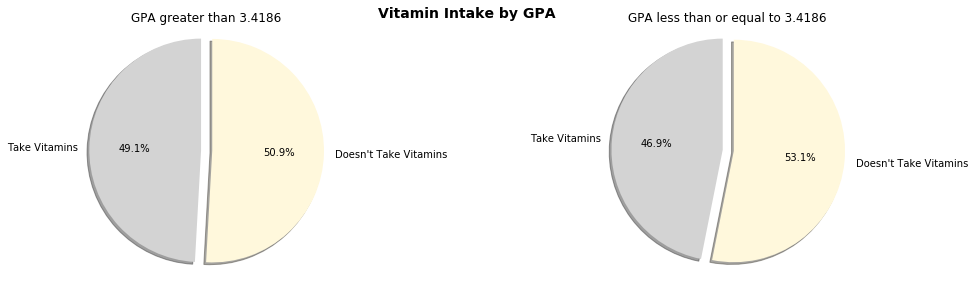

In [306]:
#Pie chart showing low/high GPA students
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) 
from matplotlib.gridspec import GridSpec

grid = GridSpec(1,2)

labels = "Take Vitamins", "Doesn't Take Vitamins"
sizes = [lowGPA_vitamins, 1 - lowGPA_vitamins]
explode = (0, 0.1) #make the second slice pop out


plt.subplot(grid[0, 0], aspect=1)
plt.title("GPA greater than 3.4186")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ("lightgrey","cornsilk"))

plt.axis('equal')  

#######################################################################################
labels = "Take Vitamins", "Doesn't Take Vitamins"
sizes = [highGPA_vitamins, 1 - highGPA_vitamins]
explode = (0, 0.1)  


plt.subplot(grid[0, 1], aspect=1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = ("lightgrey","cornsilk"))
plt.title("GPA less than or equal to 3.4186")
plt.axis('equal')  
plt.tight_layout(w_pad = 20)

fig.suptitle("Vitamin Intake by GPA", fontsize = 14, fontweight = "bold")



plt.show()

I found the mean GPA of students, which was 3.4186. I then checked to see if students who have a GPA above or the below mean take more vitamins. It turns out that students with higher GPA's tend to take more vitamins, which, according to the adverse foods events dataset, puts them at higher risk of experiencing death than students with lower GPA. 

Next, we will separate students based on gender.

In [307]:
male = college_food[college_food["Gender"] == 2]
male.head(5)
#making a new dataset. this one only contains entries from male students

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
12,3.4,2,1,430,3.0,420.0,2,"Cookies, popcorn, and chips","Sadness, boredom, late night snack",3.0,...,2.0,1.0,3,940.0,500,Soccer and basketball,3,0,575,264
14,3.1,2,1,610,3.0,420.0,2,"Pizza, fruit, spaghetti, chicken and Potatoes","Friends, environment and boredom",2.0,...,1.0,1.0,4,940.0,500,Hockey,5,1,900,185
17,3.6,2,1,430,3.0,980.0,2,"chips, cookies, ice cream",I usually only eat comfort food when I'm bored...,2.0,...,1.0,1.0,3,940.0,500,hockey,4,0,900,170


In [309]:
female = college_food[college_food["Gender"] ==1]
female.head(5)
#this one only contains entries from female students.

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,0,900,155
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,0,760,190
5,2.250,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,0,1315,190


In [310]:
male.vitamins.value_counts()

1    25
0    23
Name: vitamins, dtype: int64

In [311]:
male_vitamins = 25/(25+23)
male_vitamins
#52% of male students take vitamins...

0.5208333333333334

In [312]:
female.vitamins.value_counts()

0    40
1    33
Name: vitamins, dtype: int64

In [313]:
female_vitamins = 33/(33+40)
female_vitamins
#...compared to 45% of female students who take vitamins

0.4520547945205479

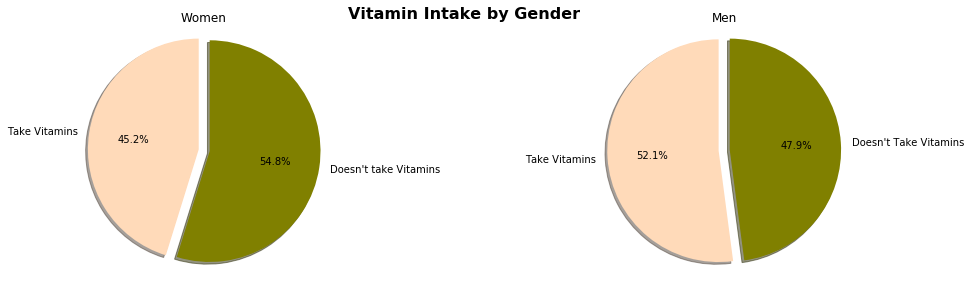

In [314]:
#Pie chart showing low/high GPA students
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) 
from matplotlib.gridspec import GridSpec

grid = GridSpec(1,2)

labels = "Take Vitamins", "Doesn't take Vitamins"
sizes = [female_vitamins, 1 - female_vitamins]
explode = (0, 0.1)  # only "explode" the 2nd slice


plt.subplot(grid[0, 0], aspect=1)
plt.title("Women")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ("peachpuff", "olive"))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


labels = "Take Vitamins", "Doesn't Take Vitamins"
sizes = [male_vitamins, 1 - male_vitamins]
explode = (0, 0.1)  


plt.subplot(grid[0, 1], aspect=1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors =("peachpuff", "olive"))
plt.title("Men")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(w_pad = 20)

fig.suptitle("Vitamin Intake by Gender", fontsize = 16, fontweight = "bold")



plt.show()

Male college students tend to take a lot more vitamins and supplements than female students. In fact, the percentage of those who do is higher than the overall college average of 47.9%. According to the FDA's adverse food events dataset, male college students have a higher risk of death than their female counterparts.


Next, we sort by income.

In [315]:
# 1 - less than $15,000 
# 2 - $15,001 to $30,000 
# 3 - $30,001 to $50,000 
#the above is the key from a word document that came with the dataset. It is also linked at the beginning of the project

#students with income less than 50k are "poor"
poor = college_food[college_food["income"] < 4]
poor.income.value_counts()



poor_vitamins = poor.vitamins.mean()
poor_vitamins

0.36666666666666664

In [317]:
# 4 - $50,001 to $70,000 
# 5 - $70,001 to $100,000 
# 6 - higher than $100,000

#students with income more than 50k are "rich
rich = college_food[college_food["income"] >= 4]
rich.income.value_counts()


rich_vitamins = rich.vitamins.mean()
rich_vitamins

0.5164835164835165

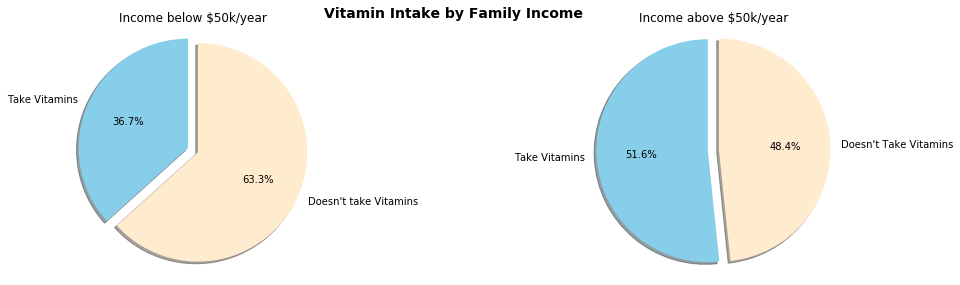

In [319]:
#Pie chart showing low/high GPA students
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4)) 
from matplotlib.gridspec import GridSpec

grid = GridSpec(1,2)

labels = "Take Vitamins", "Doesn't take Vitamins"
sizes = [poor_vitamins, 1 - poor_vitamins]
explode = (0, 0.1)  


plt.subplot(grid[0, 0], aspect=1)
plt.title("Income below $50k/year")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ("skyblue","blanchedalmond"))

plt.axis('equal')  

#############################################################
labels = "Take Vitamins", "Doesn't Take Vitamins"
sizes = [rich_vitamins, 1 - rich_vitamins]
explode = (0, 0.1)  


plt.subplot(grid[0, 1], aspect=1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ("skyblue","blanchedalmond"))
plt.title("Income above $50k/year")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(w_pad = 20)

fig.suptitle("Vitamin Intake by Family Income", fontsize = 14, fontweight = "bold")



plt.show()

Students whose families earn more than 50,000 USD per year tend to take much more vitamins than students from families below 50,000 USD per year. Separating by incomes gives the biggest difference in the likelihood of students taking vitamins. 

With the adverse food events dataset and the college students' survey dataset put together, it seems like students who have an income above $50,000/year, are male, and have a high GPA are most likely to experience death from food.

# Starting non-serious illness analysis!

To get non-serious illnesses, I first filtered by "NON-SERIOUS INJURIES/ ILLNESS" under the "Outcome" column. 

Then I looked at the symptoms column to decide which to further filter by and analyze.

In [320]:
notSerious = adverse[adverse["Outcome"].str.match('NON-SERIOUS INJURIES/ ILLNESS')]
notSerious.head()

,Event_Start_Date,Product_Name,Industry_Name,Consumer_Age,Units_of_Age,Gender,Outcome,Symptoms
Report_ID,,,,,,,,
65335,11/24/2003,ENFAMIL LIPIL BABY FORMULA,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
65345,12/21/2003,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
65355,10/27/2003,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,Soft Drink/Water,NaN,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"RASH, FLUSHING, MALAISE, FAECES PALE, VOMITING..."
65356,10/27/2003,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,Soft Drink/Water,NaN,Not Available,Not Available,NON-SERIOUS INJURIES/ ILLNESS,"LOOSE STOOLS, ABDOMINAL PAIN UPPER, VOMITING, ..."
65357,10/27/2003,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,Soft Drink/Water,NaN,Not Available,Not Available,NON-SERIOUS INJURIES/ ILLNESS,"RASH, LOOSE STOOLS, ABDOMINAL PAIN UPPER, MALA..."


In [321]:
notSerious.shape

(25356, 8)

There is a huge variety of symptoms, just by looking at the first 5 entries. There are also over 25,000 entries. I chose three symptoms (somewhat arbitrarily): malaise, vomiting, and nausea. 

In [322]:
#I wanted to see types of food are causing malaise. 
malaise = notSerious[notSerious["Symptoms"].str.match('MALAISE')]
#malaise.shape
malaise.Industry_Name.value_counts()

Vegetables/Vegetable Products             140
Nuts/Edible Seed                          120
Fruit/Fruit Prod                           88
Bakery Prod/Dough/Mix/Icing                88
Fishery/Seafood Prod                       83
Vit/Min/Prot/Unconv Diet(Human/Animal)     67
Soft Drink/Water                           59
Snack Food Item                            33
Mult Food Dinner/Grav/Sauce/Special        33
Cereal Prep/Breakfast Food                 32
Milk/Butter/Dried Milk Prod                29
Choc/Cocoa Prod                            20
Coffee/Tea                                 18
Dressing/Condiment                         16
Cheese/Cheese Prod                         15
Ice Cream Prod                             11
Dietary Conv Food/Meal Replacements         9
Meat, Meat Products and Poultry             9
Prep Salad Prod                             8
Whole Grain/Milled Grain Prod/Starch        7
Vegetable Oils                              7
Egg/Egg Prod                      

In [323]:
#Same idea here: what types are foods are causing vomiting?
vomiting = notSerious[notSerious["Symptoms"].str.match('VOMITING')]
vomiting.shape
vomiting.Industry_Name.value_counts()

Vegetables/Vegetable Products             505
Fruit/Fruit Prod                          295
Nuts/Edible Seed                          278
Bakery Prod/Dough/Mix/Icing               271
Soft Drink/Water                          204
Fishery/Seafood Prod                      171
Milk/Butter/Dried Milk Prod               158
Baby Food Prod                            140
Vit/Min/Prot/Unconv Diet(Human/Animal)    123
Snack Food Item                           122
Mult Food Dinner/Grav/Sauce/Special       117
Cereal Prep/Breakfast Food                102
Ice Cream Prod                             88
Coffee/Tea                                 84
Choc/Cocoa Prod                            68
Dietary Conv Food/Meal Replacements        46
Dressing/Condiment                         45
Soup                                       43
Cheese/Cheese Prod                         43
Whole Grain/Milled Grain Prod/Starch       40
Spices, Flavors And Salts                  32
Macaroni/Noodle Prod              

In [324]:
#What types of food are causing nausea?
nausea = notSerious[notSerious["Symptoms"].str.match('NAUSEA')]
nausea.shape
nausea.Industry_Name.value_counts()

Vegetables/Vegetable Products             293
Bakery Prod/Dough/Mix/Icing               234
Soft Drink/Water                          223
Nuts/Edible Seed                          210
Fruit/Fruit Prod                          152
Vit/Min/Prot/Unconv Diet(Human/Animal)    129
Milk/Butter/Dried Milk Prod               118
Fishery/Seafood Prod                      112
Cereal Prep/Breakfast Food                101
Snack Food Item                            92
Mult Food Dinner/Grav/Sauce/Special        80
Coffee/Tea                                 51
Ice Cream Prod                             50
Choc/Cocoa Prod                            50
Candy W/O Choc/Special/Chew Gum            30
Soup                                       25
Whole Grain/Milled Grain Prod/Starch       25
Dietary Conv Food/Meal Replacements        25
Dressing/Condiment                         24
Cheese/Cheese Prod                         21
Filled Milk/Imit Milk Prod                 20
Macaroni/Noodle Prod              

Overall, it looks like the food groups that cause mild symptoms the most are fruits, nuts, vegetables, and baked goods. 
The college food dataset happens to have a column for fruits and a column for vegetables, so we'll compare consumption of
fruits and vegetables across gender, GPA, and income, which were the same characteristics used for severe symptoms. 

There is a veggies_day column under college_food, in which students responded with numbers from 1-5 depending on likely they are to consume vegetables. 1 was "very unlikely", while 5 was "very likely" 

In [325]:
college_food["veggies_day"].mean()

4.024793388429752

On average, college students are a little bit more than "likely", which was a 4/5, to eat vegetables in a day. This is an index of how willing students are, or how much they enjoy eating vegetables, than a measurement of the vegetables they eat in a day. This is comparable across my chosen characterstics because it will be consistent: using the same scale of 1-5.

In [326]:
college_food["fruit_day"].mean()
#in general, college students eat a lot of fruit. 

4.239669421487603

In [327]:
male_vegetable = male["veggies_day"].mean()
male_vegetable
#out of 5, 3.875 isn't that many vegetables

3.875

In [328]:
male_fruits = male["fruit_day"].mean()
male_fruits
#but they eat more fruit

4.041666666666667

In [256]:
female_vegetable = female["veggies_day"].mean()
female_vegetable
#

4.123287671232877

In [329]:
female_fruits = female["fruit_day"].mean()
female_fruits

4.36986301369863

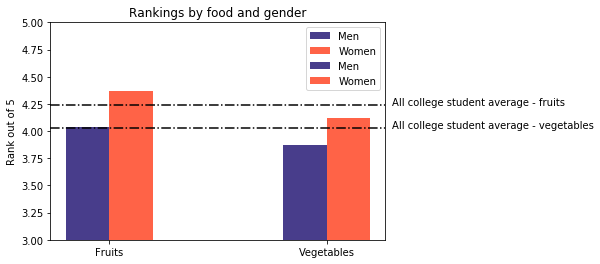

In [349]:
N = 2
men_avgs = (male_fruits, male_vegetable)
women_avgs = (female_fruits, female_vegetable)

ind = np.arange(N) 
width = 0.2       
plt.bar(ind, men_avgs, width, label='Men', color = "darkslateblue")
plt.bar(ind + width, women_avgs, width,
    label='Women', color = "tomato")

plt.ylabel('Rank out of 5')
plt.title('Rankings by food and gender')

plt.xticks(ind + width / 2, ("Fruits", "Vegetables"))
plt.legend(loc='best')
plt.ylim(3,5)
#plt.legend(loc = "center")
#plt.subplots_adjust(right = 0.7)

plt.axhline(y=college_food["fruit_day"].mean(), color='black',  linestyle = '-.')
plt.text(y = college_food["fruit_day"].mean(), x = 1.4, s = "All college student average - fruits")

plt.axhline(y=college_food["veggies_day"].mean(), color='black',  linestyle = '-.')
plt.text(y = college_food["veggies_day"].mean(), x = 1.4, s = "All college student average - vegetables")

plt.show()

The chart above shows the average responses by men and women to fruits and vegetables. The y-axis starts from 3 and goes to 5 to better show the differences in means. 

Overall, female college students tend to eat more fruits and vegetables, which puts them at greater risk of non-serious illnesses like vomiting, nausea, and malaise. 

Next, we compare by GPA.

In [331]:
highGPA_fruits = highGPA["fruit_day"].mean()
highGPA_fruits

4.265625

In [332]:
highGPA_vegetables = highGPA["veggies_day"].mean()
highGPA_vegetables

4.09375

In [333]:
lowGPA_fruits = lowGPA["fruit_day"].mean()
lowGPA_fruits

4.2105263157894735

In [334]:
lowGPA_vegetables = lowGPA["veggies_day"].mean()
lowGPA_vegetables

3.9473684210526314

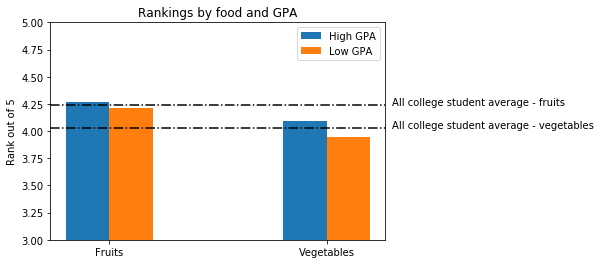

In [335]:
N = 2
highGPA_avgs = (highGPA_fruits, highGPA_vegetables)
lowGPA_avgs = (lowGPA_fruits, lowGPA_vegetables)

ind = np.arange(N) 
width = 0.2       
plt.bar(ind, highGPA_avgs, width, label='High GPA')
plt.bar(ind + width, lowGPA_avgs, width,
    label='Low GPA')

plt.ylabel('Rank out of 5')
plt.title('Rankings by food and GPA')

plt.xticks(ind + width / 2, ("Fruits", "Vegetables"))
plt.legend(loc='best')
plt.ylim(3,5)
#plt.legend(loc = "center")
#plt.subplots_adjust(right = 0.7)

plt.axhline(y=college_food["fruit_day"].mean(), color='black',  linestyle = '-.')
plt.text(y = college_food["fruit_day"].mean(), x = 1.4, s = "All college student average - fruits")

plt.axhline(y=college_food["veggies_day"].mean(), color='black',  linestyle = '-.')
plt.text(y = college_food["veggies_day"].mean(), x = 1.4, s = "All college student average - vegetables")

plt.show()

Once again, set the y-axis from 3 to 5 to better show differences. 
Students with high GPA eat more fruits and vegetables than students with lower GPA's. There is very little difference in fruits consumed across GPA.

Next, we compare by family income.

In [336]:
rich_fruits = rich["fruit_day"].mean()
rich_fruits

4.318681318681318

In [337]:
poor_fruits = poor["fruit_day"].mean()
poor_fruits

4.0

In [338]:
rich_vegetables = rich["veggies_day"].mean()
rich_vegetables

4.032967032967033

In [339]:
poor_vegetables = poor["veggies_day"].mean()
poor_vegetables

4.0

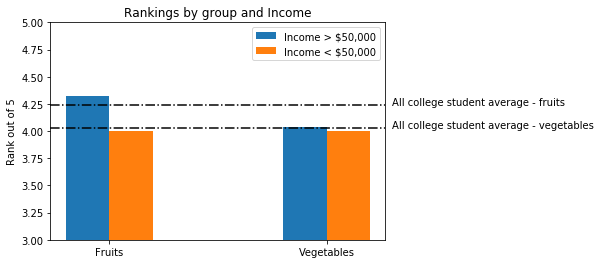

In [340]:
N = 2
rich_avgs = (rich_fruits, rich_vegetables)
poor_avgs = (poor_fruits, poor_vegetables)

ind = np.arange(N) 
width = 0.2       
plt.bar(ind, rich_avgs, width, label='Income > $50,000')
plt.bar(ind + width, poor_avgs, width,
    label='Income < $50,000')

plt.ylabel('Rank out of 5')
plt.title('Rankings by group and Income')

plt.xticks(ind + width / 2, ("Fruits", "Vegetables"))
plt.legend(loc='best')
plt.ylim(3,5)
#plt.legend(loc = "center")
#plt.subplots_adjust(right = 0.7)

plt.axhline(y=college_food["fruit_day"].mean(), color='black',  linestyle = '-.')
plt.text(y = college_food["fruit_day"].mean(), x = 1.4, s = "All college student average - fruits")

plt.axhline(y=college_food["veggies_day"].mean(), color='black',  linestyle = '-.')
plt.text(y = college_food["veggies_day"].mean(), x = 1.4, s = "All college student average - vegetables")

plt.show()

The y-axis is again set from 3 to 5. 

The data suggests that students with higher income eat more fruits and vegetables, with a significant positive difference in fruits consumed. This means that students who come from families with high income are more likely to experience non-serious illness and injury. 

# Conclusion

From the serious illnesses section, we learned that college students who have an income above $50,000/year, are male, and have a high GPA are more likely to experience death from food.

From the non-serious illnesses section, we learned that college students who have an income above $50,000/year, high GPA, and are female, are more likely to experience non-serious illnesses from food.

**The common characteristic is a high GPA and a high income that puts students at higher risk of both serious and non-serious illness from food.**

Of course, this conclusion isn't meant to be taken seriously or followed. The data only suggests a higher risk of death, specifically for serious illness,  and nausea, vomiting, and malaise, specifically for non-serious illness. It is not an aggregate risk factor.

In addition, there are many variables that I did not control for, or could not control for. 

Starting from the FDA's dataset: there were many other symptoms that occured before death. I did not group by any sort of cause that symptoms might have suggested. For example, death from allergic reaction should be separated from death by choking on food, especially since vitamins and pills are more likely to cause choking. This would have been difficult to do, since the symptoms were in one long string. 

The non-serious symptoms I chose were arbitrary. There could be severe vomiting, or severe nausea. I filtered by the Outcomes column which stated that they were non-serious, but level of severity may be subjective. There could be other symptoms that were not serious, such as rashes.


The college students' dataset is subject to even more bias. All data was self-reported, which means there is selection bias. Students could also lie and put a higher GPA, or a higher family income, or a random number if they were unsure. They may have reported higher consumption of fruits and vegetables because it makes them sound healthier. 

Because of the nature of my choice of datasets and vast amount of variables that could not be reasonably controlled for, my conclusions cannot be applied outside of this project. "Getting a high GPA causes a student to be at higher risk of death" is an unreasonable conclusion because the data is cross-sectional. Without controlling for many variables, I cannot state a correlation, either.

Please eat your fruits and vegetables, and work hard in school! 

Below is all my variables, compiled.

In [341]:
totals = {"High Income": [rich_vitamins, rich_fruits, rich_vegetables], "Low Income": [poor_vitamins, poor_fruits, poor_vegetables], "Male": 
         [male_vitamins, male_fruits, male_vegetable], "Female": [female_vitamins, female_fruits, female_vegetable], "High GPA": 
         [highGPA_vitamins, highGPA_fruits, highGPA_vegetables], "Low GPA": [lowGPA_vitamins, lowGPA_fruits, lowGPA_vegetables], "Type": 
         ["Vitamins", "Fruits", "Vegetables"]}

In [342]:
totaldf = pd.DataFrame(totals)

In [343]:
totaldf

,Female,High GPA,High Income,Low GPA,Low Income,Male,Type
0,0.452055,0.468750,0.516484,0.491228,0.366667,0.520833,Vitamins
1,4.369863,4.265625,4.318681,4.210526,4.000000,4.041667,Fruits
2,4.123288,4.093750,4.032967,3.947368,4.000000,3.875000,Vegetables


In [344]:
totaldf.set_index("Type", inplace = True)

In [345]:
totaldf

,Female,High GPA,High Income,Low GPA,Low Income,Male
Type,,,,,,
Vitamins,0.452055,0.468750,0.516484,0.491228,0.366667,0.520833
Fruits,4.369863,4.265625,4.318681,4.210526,4.000000,4.041667
Vegetables,4.123288,4.093750,4.032967,3.947368,4.000000,3.875000


In [346]:
#transposing it
totaldf1 = totaldf
totaldf1 = totaldf1.transpose()

In [347]:
totaldf1

Type,Vitamins,Fruits,Vegetables
Female,0.452055,4.369863,4.123288
High GPA,0.468750,4.265625,4.093750
High Income,0.516484,4.318681,4.032967
Low GPA,0.491228,4.210526,3.947368
Low Income,0.366667,4.000000,4.000000
Male,0.520833,4.041667,3.875000


## Bibliography

Borapajo. "College students' food and cooking preferences". (2016). Dataset. Kaggle. https://www.kaggle.com/borapajo/food-choices

FDA. "Adverse Food Events - 90,000 product-related user-reported adverse medical events" (2017). Dataset. Kaggle. https://www.kaggle.com/fda/adverse-food-events